In [1]:
# INPUT FEATURES given below


   # GRE score ( out of 340)
   # TOEFL score (out of 120)
   # University rating (out of 5)
   # Statement of Purpose(SOP)
   # Letter of Recommendation (LOR) Strength (out of 5)
   # Undergraduate GPA (out of 10)
   # Research experience (either 0 or 1)


# outputs are given below

  # chance of admission (rating from 0 to 1)
    

# IMPORT LIBRARIES AND DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
# read the csv file
df=pd.read_csv('Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Let's drop the serial no.
df.drop('Serial No.',axis=1,inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# PERFORM EXPLORATORY DATA ANALYSIS

In [6]:
# checking the null values
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
# Statistical summary of the dataframe
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
# Grouping by University ranking

df_univrating=df.groupby(by='University Rating').mean()
df_univrating

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

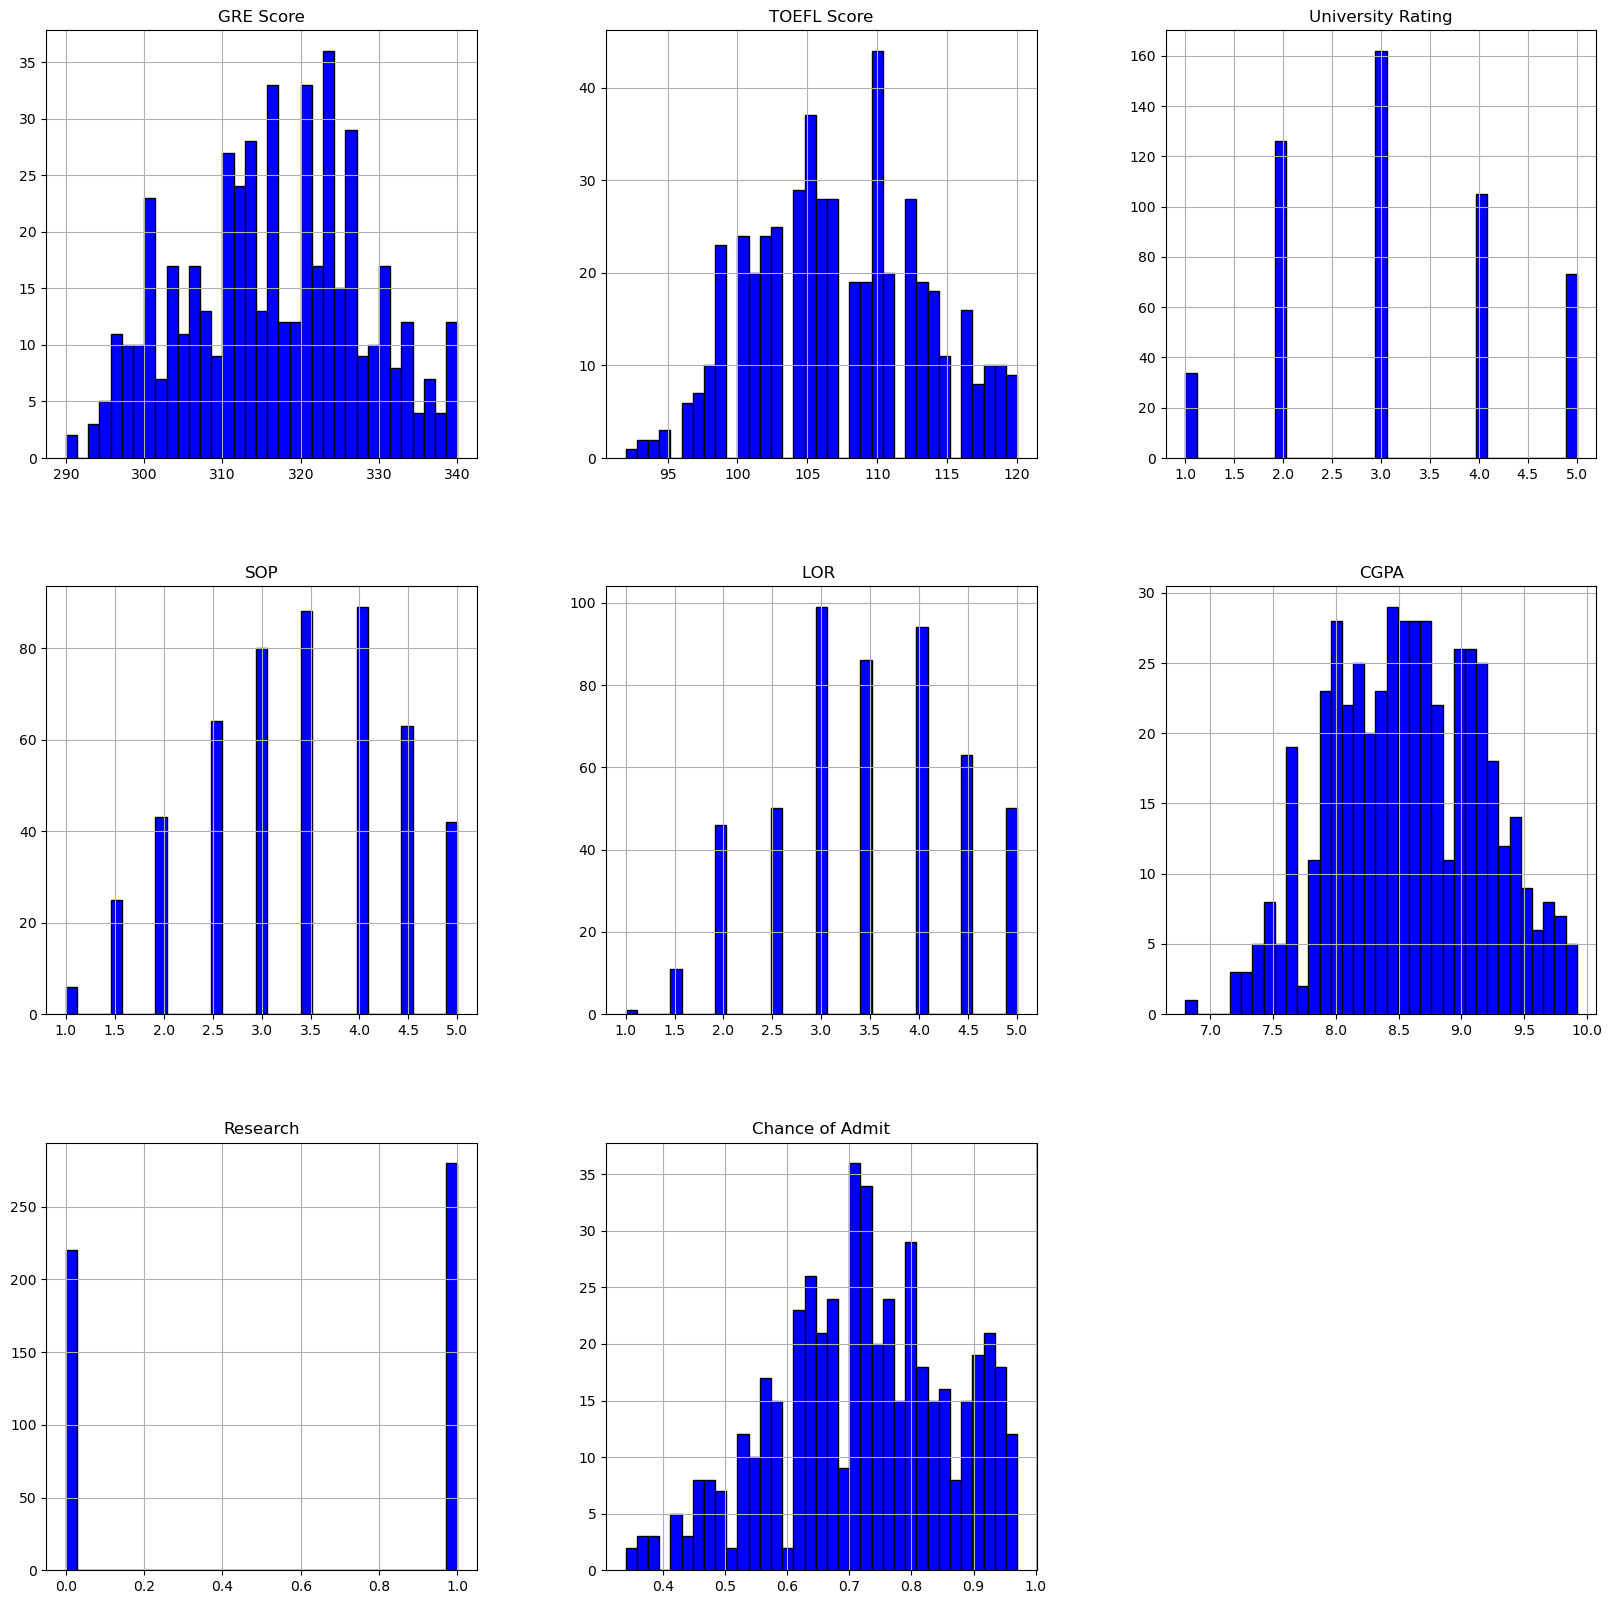

In [10]:
df.hist(bins=35,figsize=(20,20),color='blue',edgecolor="black")

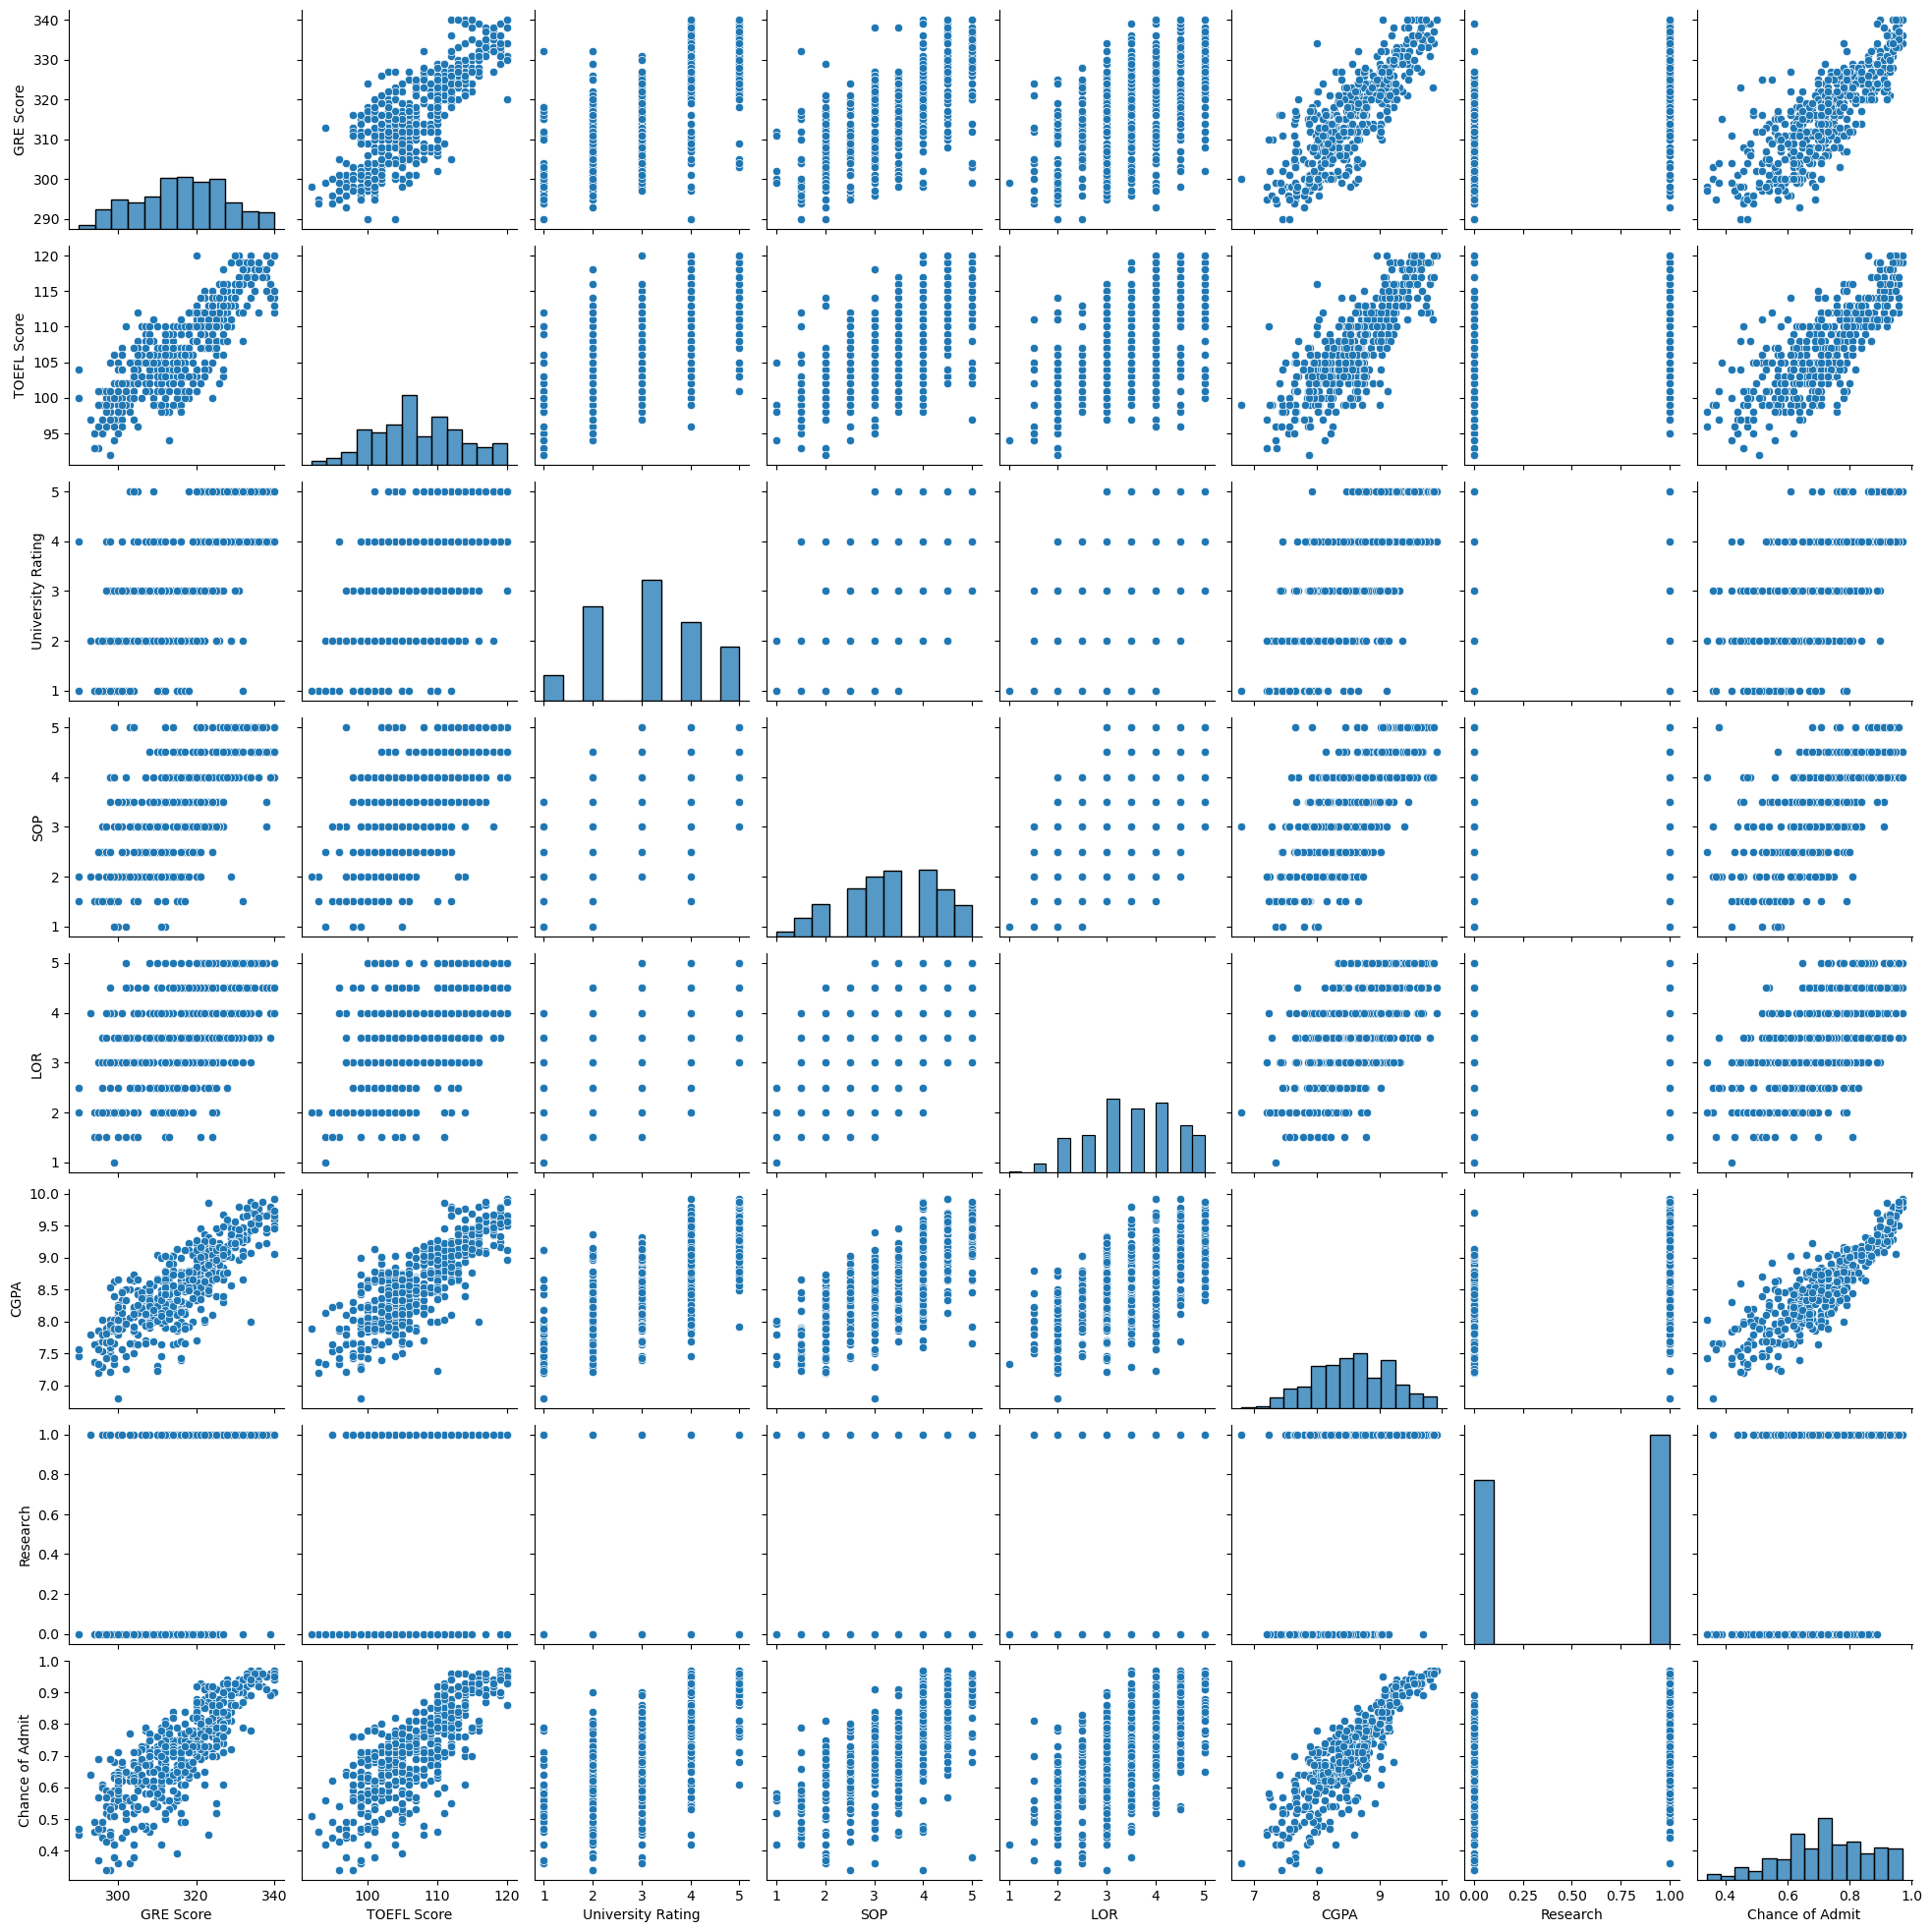

In [11]:
sns.pairplot(df)

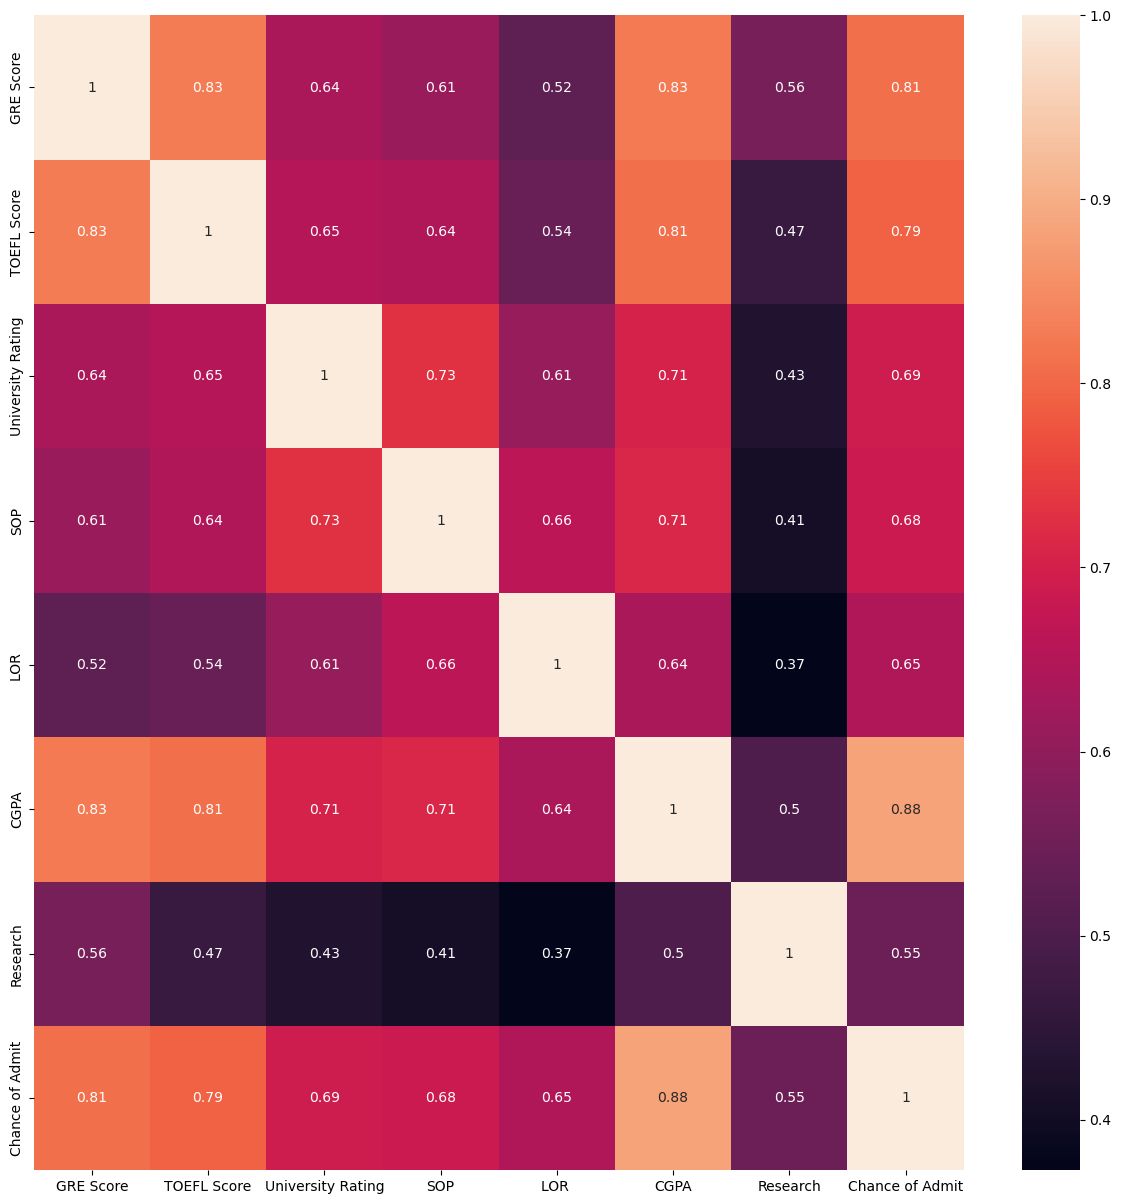

In [12]:
corr_matrix=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [13]:
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# CREATE TRAINING AND TESTING DATASET

In [14]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [15]:
# input veriable are all variable except 'Chance of Admit'
x=df.drop(columns=['Chance of Admit'])

In [16]:
# output veriable is 'Chance of Admit'
y=df['Chance of Admit']

In [17]:
x.shape

(500, 7)

In [18]:
y.shape

(500,)

In [19]:
# convert x into a numpy array
x=np.array(x)
y=np.array(y)
y.shape

(500,)

In [20]:
# reshape the data of y into (500,1)
y=y.reshape((500,1))
y.shape

(500, 1)

In [21]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x=StandardScaler()
x=scaler_x.fit_transform(x)

In [22]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [23]:
# spliting the data in to test and train sets
# 85% train data and 15% test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=42)

# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [25]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(x_train,y_train)

LinearRegression()

In [26]:
accuracy_LinearRegression= LinearRegression_model.score(x_test,y_test)
accuracy_LinearRegression

0.8481152911054778

# TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [27]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
accuracy_DecisionTree=DecisionTree_model.score(x_test,y_test)
accuracy_DecisionTree

0.6292202268906717

In [29]:
# Many decision Trees make up a random forest model which is an ensemble model.
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

from sklearn.ensemble import RandomForestRegressor
RandomForest_model=RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForest_model.fit(x_train,y_train)

C:\Users\Supriya Mandal\AppData\Local\Temp\ipykernel_20688\481989693.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(x_train,y_train)


RandomForestRegressor(max_depth=10)

In [30]:
accuracy_RandomForest= RandomForest_model.score(x_test,y_test)
accuracy_RandomForest

0.8064392593503145

# PRINT KPIs FOR THE BEST MODEL

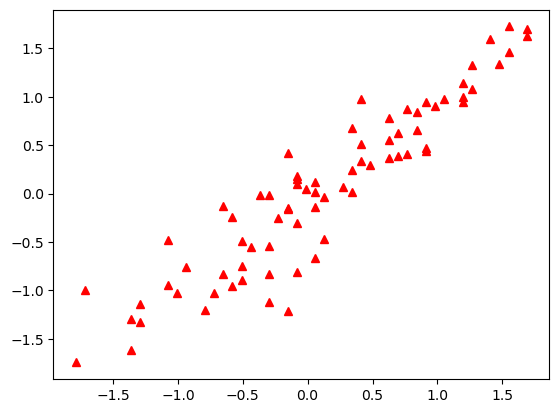

In [31]:
y_predict=LinearRegression_model.predict(x_test)
plt.plot(y_test,y_predict,'^',color='red')

In [32]:
y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig=scaler_y.inverse_transform(y_test)

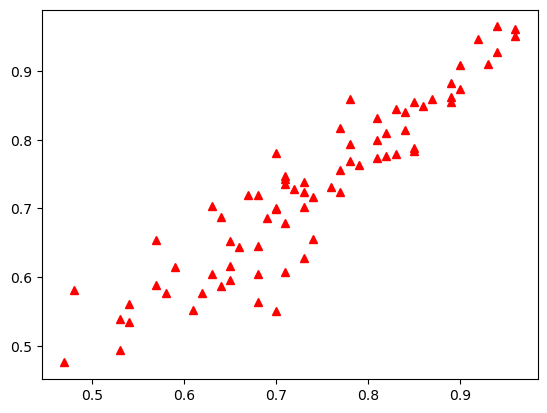

In [33]:
plt.plot(y_test_orig,y_predict_orig,'^',color='r')

In [34]:
k=x_test.shape[1]
n=len(x_test)
n

75

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.046 
MSE = 0.0021459459748563218 
MAE = 0.034492032502344686 
R2 = 0.8481152911054779 
Adjusted R2 = 0.8322467394299308
